<a href="https://colab.research.google.com/github/ilhamydn17/PCVK_Ganjil_2023/blob/jobsheet-week-12/Jobsheet_PCVK_Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PCVK WEEK-11
# Face Detection

In [ ]:
# path to folder image
path = "drive/MyDrive/Kuliah/PCVK/"

In [ ]:
# import library
import cv2 as cv
from google.colab.patches import cv2_imshow as show
from matplotlib import pyplot as plt

### 1. Face Detection Image


In [ ]:
def showImg(image):
  # memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
  b,g,r  = cv.split(image)
  rgb_image = cv.merge([r,g,b])

  # menampilkan gambar dalam ukuran tertentu
  plt.figure(figsize=(4,6))
  plt.imshow(rgb_image)
  plt.title('Result')
  plt.show()

In [ ]:
def faceDet(image, ng):
  # load face detection model
  face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
  imgOrJk = cv.imread(path + 'images/facedet/' + image)
  # load image
  imgJk = cv.imread(path + 'images/facedet/' + image)
  gray = cv.cvtColor(imgJk, cv.COLOR_BGR2GRAY)

  # perform face detection
  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=ng, minSize=(20,20))
  # draw rectangle around detected faces
  for(x,y,w,h) in faces:
    cv.rectangle(imgJk, (x,y), (x+w, y+h), (0,255,0), 2)

  showImg(imgJk)

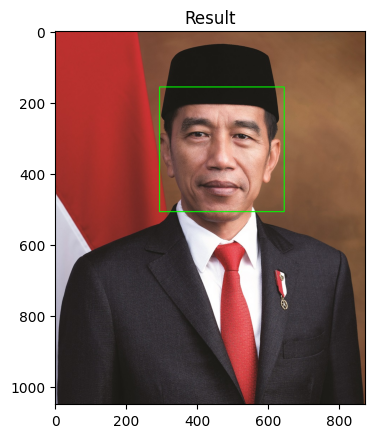

In [ ]:
faceDet('jokowi.jpg', 18)

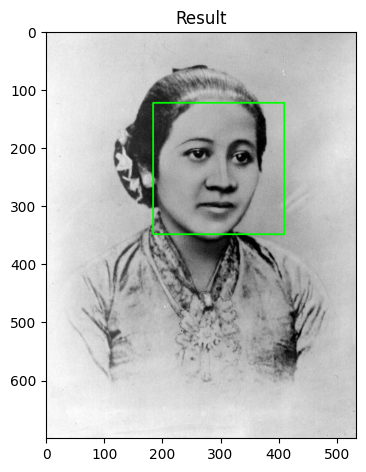

In [ ]:
faceDet('kartini.jpg', 18)

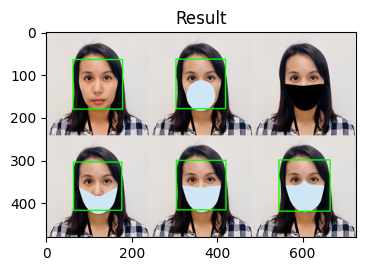

In [ ]:
faceDet('mask.png', 18)

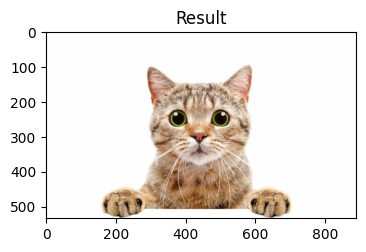

In [ ]:
faceDet('kucing.jpg', 18)

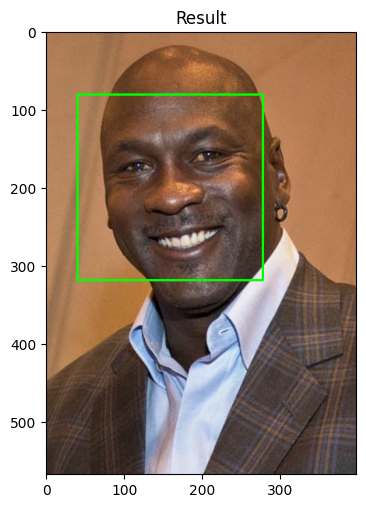

In [ ]:
faceDet('mjordan.jpg', 18)

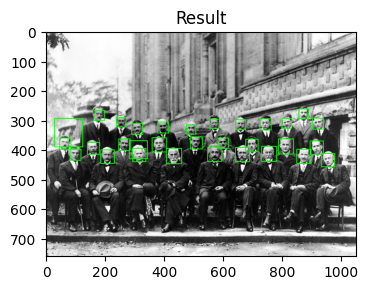

In [ ]:
faceDet('solvayconf.jpg', 3)

### 2. Cat Face Detection

<Figure size 1000x1000 with 0 Axes>

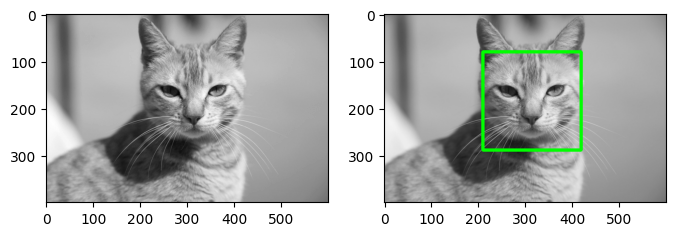

In [ ]:
cascade_kucing = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalcatface.xml')

mycat = cv.imread(path + 'images/facedet/mycat.jpg', 0)

mycat1 = cv.cvtColor(mycat, cv.COLOR_GRAY2RGB)

roi_wajah = cascade_kucing.detectMultiScale(mycat)

for(x, y, w, h) in roi_wajah:
  cv.rectangle(mycat1, (x, y), (x+w, y+h), (0, 255, 0), 6)

plt.figure(figsize = (10, 10))
f, axarr = plt.subplots(1, 2, figsize = (8, 8))
plt.subplot(121), plt.imshow(mycat, cmap = 'gray')
plt.subplot(122), plt.imshow(mycat1)
plt.show()

### 3. Eyes Detection

In [ ]:
# load face detection model
eye_casc = cv.CascadeClassifier(path + 'images/haarcascades/haarcascade_eye.xml')

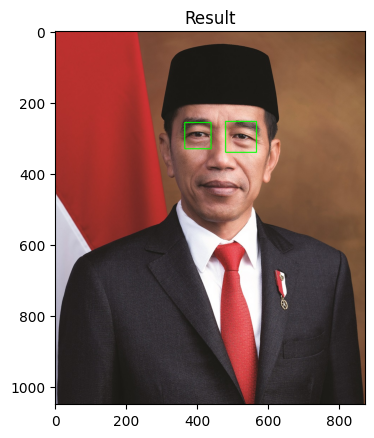

In [ ]:
# load image
imgJk = cv.imread(path + 'images/facedet/jokowi.jpg')
gray = cv.cvtColor(imgJk, cv.COLOR_BGR2GRAY)

# perform face detection
eyes = eye_casc.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(20,20))
# draw rectangle around detected faces
for(x,y,w,h) in eyes:
  cv.rectangle(imgJk, (x,y), (x+w, y+h), (0,255,0), 2)

showImg(imgJk)